In [1]:
import numpy as np
import scipy as sp
from scipy.fft import fft2,ifft2,fftfreq,fftshift
import imageio
import scipy.special as sp

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from matplotlib.animation import PillowWriter
import pint

u = pint.UnitRegistry()

using lightpipes tool for lens in front of aperture

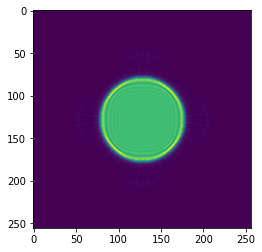

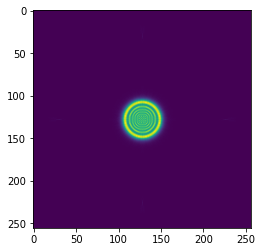

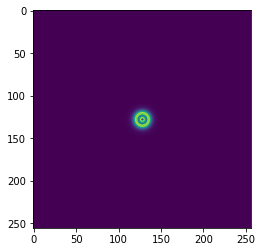

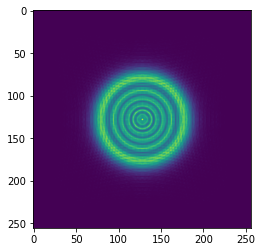

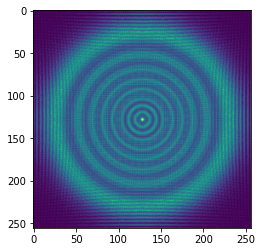

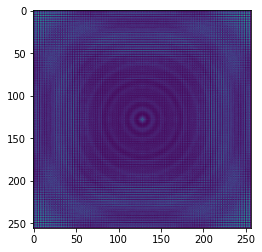

In [2]:
from LightPipes import *
import matplotlib.pyplot as plt

Field1=Begin(20*mm, 1*um, 256)
Field = CircAperture(5*mm, 0, 0, Field1)
Field = Lens(Field,1*m)
k = [0.2,0.4,0.6,0.8,1,1.2]
'''for i in k:
    z = i*m
    Field = Forvard(z, Field)
    I = Intensity(Field)
    plt.imshow(I)
    plt.show()'''
x=np.arange(256)
for i in k:
    z = i*m
    Field = Forvard(z,Field)
    I = Intensity(Field)
    #plt.plot(x,I[128])
    plt.imshow(I)
    plt.show()

lens phase modulation

In [3]:
x = np.linspace(-2,2,2000)
xv,yv = np.meshgrid(x,x)


/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


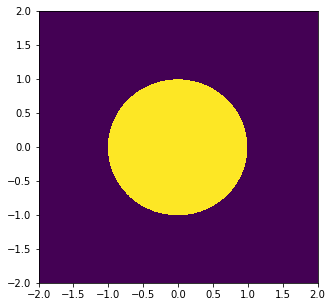

In [4]:
circ = np.sqrt(xv**2 + yv**2)<1
U1 = circ.astype(float)
plt.figure(figsize=(5,5))
#plt.plot(xv,U1)
plt.pcolormesh(xv,yv,U1)

In [5]:
lam = 0.0006
k = 2*np.pi/lam
f = 200

In [6]:
r = np.sqrt(xv**2 + yv**2)
U01 = np.exp(-1j*k*0.5*r*0.0872)
#U01 = np.exp(-1j*k*(xv**2 + yv**2)/(2*f))    # LENS PHASE MODIFICATION
U02 = U01
U0 = 50*U02*U1

In [7]:
A = fft2(U0)
kx = fftfreq(len(x),np.diff(x)[0])*2*np.pi
kxv,kyv = np.meshgrid(kx,kx)

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


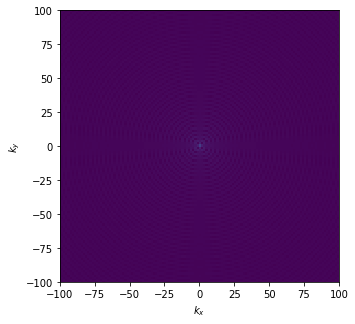

In [8]:
plt.figure(figsize=(5,5))
plt.pcolormesh(fftshift(kxv),fftshift(kyv),np.abs(fftshift(A)))
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

In [9]:
def get_U(z,k):
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


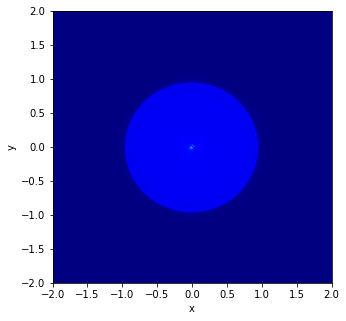

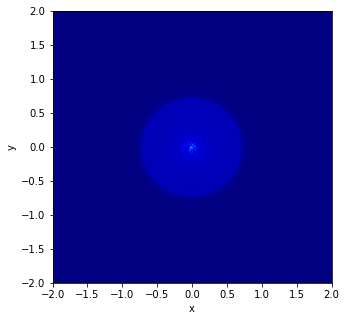

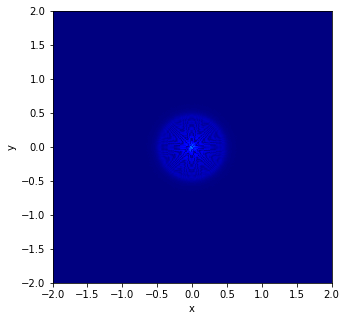

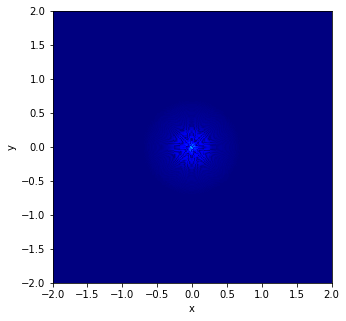

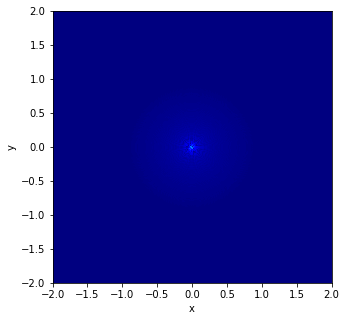

In [ ]:
lam = 0.0006
k = 2*np.pi/lam
z = np.arange(1,50,5)
for i in z:
    z1 = i
    U = get_U(z1,k)     #get value of U
    plt.figure(figsize=(5,5))
    plt.pcolormesh(xv,yv,np.abs(U),cmap='jet')
    #plt.plot(xv,np.abs(U))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.show()

In [ ]:
print(1/(0.5*0.0872))